import numpy as np 
import pandas as pd
import os
print(os.listdir("../input"))

import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="darkgrid")
color = sns.color_palette()
%matplotlib inline

In [3]:
import numpy as np 
import pandas as pd
#import os
#print(os.listdir("../input"))

import matplotlib.pyplot as plt
import seaborn as sns
#sns.set(style="darkgrid")
#color = sns.color_palette()
%matplotlib inline

In [4]:
data = pd.read_csv("BreadBasket.csv")
data.shape
data.head(10)

,Date,Time,Transaction,Item
0,2016-10-30,09:58:11,1,Bread
1,2016-10-30,10:05:34,2,Scandinavian
2,2016-10-30,10:05:34,2,Scandinavian
3,2016-10-30,10:07:57,3,Hot chocolate
4,2016-10-30,10:07:57,3,Jam
5,2016-10-30,10:07:57,3,Cookies
6,2016-10-30,10:08:41,4,Muffin
7,2016-10-30,10:13:03,5,Coffee
8,2016-10-30,10:13:03,5,Pastry
9,2016-10-30,10:13:03,5,Bread



data preprocess

In [5]:
data['Date'] = pd.to_datetime(data['Date'],format='%Y-%m-%d')

In [6]:
data['Time'] = pd.to_datetime(data['Time'])
data['Times'] = data['Time'].dt.time

In [7]:
#tot_tr = data.groupby('Date', as_index=True)['Transaction'].sum().reset_index()
tot_tr1 = data.groupby(['Date', 'Transaction']).size().reset_index()
tot_tr1.columns = ['Date', 'Transaction', 'count']
tot_tr1

,Date,Transaction,count
0,2016-10-30,1,1
1,2016-10-30,2,2
2,2016-10-30,3,3
3,2016-10-30,4,1
4,2016-10-30,5,3
...,...,...,...
9526,2017-04-09,9680,1
9527,2017-04-09,9681,4
9528,2017-04-09,9682,4
9529,2017-04-09,9683,2


In [8]:
tot_tr = tot_tr1.groupby('Date', as_index=True)['count'].sum().reset_index()
tot_tr.columns = ['Date', 'Transaction']

In [9]:
tot1 = tot_tr.iloc[:56]
tot2 = tot_tr.iloc[56:]

In [10]:
b = pd.to_datetime('2017-01-02 00:00:00',format='%Y-%m-%d')
c = pd.to_datetime('2016-12-25 00:00:00',format='%Y-%m-%d')
d = pd.to_datetime('2016-12-26 00:00:00',format='%Y-%m-%d')

In [11]:
tot2.loc[-2] = [c, 0]
tot2.loc[-1] = [d, 0] 
tot2.index = tot2.index + 2
tot2 = tot2.sort_index()
tot2 = tot2.rename(index={0: 56, 1:57})

C:\Users\vaish\Anaconda3\lib\site-packages\pandas\core\indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


In [12]:

#tot1.append(tot2)
tot_tr2 = tot1.append(tot2)

In [13]:
tot1 = tot_tr2.iloc[:64]
tot2 = tot_tr2.iloc[64:]

In [14]:
tot2.loc[-1] = [b, 0]
tot2.index = tot2.index + 1
tot2 = tot2.sort_index()
tot2 = tot2.rename(index={0:64})

In [15]:
#tot1.append(tot2)
tot_tr3 = tot1.append(tot2)

In [16]:
tot_tr3 = tot_tr3.replace({'Transaction': {0: 1}})
tot_tr3

,Date,Transaction
0,2016-10-30,180
1,2016-10-31,205
2,2016-11-01,154
3,2016-11-02,169
4,2016-11-03,195
...,...,...
157,2017-04-05,145
158,2017-04-06,119
159,2017-04-07,103
160,2017-04-08,209


Apriori Algorithm

In [17]:
item_cnt = data['Item'].value_counts().reset_index()
item_cnt.columns = ['Item', 'Count']

Text(0.5, 1.0, 'Item Sales distribution')

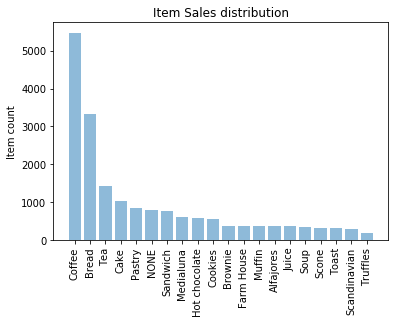

In [18]:
objects = (list(item_cnt['Item'].head(n=20)))
y_pos = np.arange(len(objects))
performance = list(item_cnt['Count'].head(n=20))
plt.bar(y_pos, performance, align='center', alpha=0.5)
plt.xticks(y_pos, objects, rotation='vertical')
plt.ylabel('Item count')
plt.title('Item Sales distribution')

In [19]:
total_item_count = item_cnt['Item'].count()
item_cnt['item_perc'] = item_cnt['Count']/total_item_count
item_cnt['total_perc'] = item_cnt.item_perc.cumsum()
ict = item_cnt.head(10)
ict

,Item,Count,item_perc,total_perc
0,Coffee,5471,57.589474,57.589474
1,Bread,3325,35.000000,92.589474
2,Tea,1435,15.105263,107.694737
3,Cake,1025,10.789474,118.484211
4,Pastry,856,9.010526,127.494737
5,NONE,786,8.273684,135.768421
6,Sandwich,771,8.115789,143.884211
7,Medialuna,616,6.484211,150.368421
8,Hot chocolate,590,6.210526,156.578947
9,Cookies,540,5.684211,162.263158


In [20]:
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

In [21]:
items = []
for i in data['Transaction'].unique():
    itemlist = list(set(data[data["Transaction"]==i]['Item']))
    if len(itemlist) > 0:
        items.append(itemlist)

In [22]:
from mlxtend.preprocessing import TransactionEncoder

oht = TransactionEncoder()
oht_item = oht.fit(items).transform(items)
df1 = pd.DataFrame(oht_item, columns=oht.columns_)
frequent_itemset = apriori(df1, use_colnames=True, min_support=0.02)
rules = association_rules(frequent_itemset, metric="lift", min_threshold=0.5)

In [23]:
rules.head(10)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Cake),(Bread),0.103137,0.324940,0.023187,0.224822,0.691888,-0.010326,0.870846
1,(Bread),(Cake),0.324940,0.103137,0.023187,0.071359,0.691888,-0.010326,0.965780
2,(Coffee),(Bread),0.475081,0.324940,0.089393,0.188163,0.579069,-0.064980,0.831522
3,(Bread),(Coffee),0.324940,0.475081,0.089393,0.275105,0.579069,-0.064980,0.724131
4,(NONE),(Bread),0.079005,0.324940,0.020564,0.260292,0.801048,-0.005107,0.912604
5,(Bread),(NONE),0.324940,0.079005,0.020564,0.063287,0.801048,-0.005107,0.983220
6,(Pastry),(Bread),0.085510,0.324940,0.028958,0.338650,1.042194,0.001172,1.020731
7,(Bread),(Pastry),0.324940,0.085510,0.028958,0.089119,1.042194,0.001172,1.003961
8,(Tea),(Bread),0.141643,0.324940,0.027909,0.197037,0.606380,-0.018117,0.840712
9,(Bread),(Tea),0.324940,0.141643,0.027909,0.085890,0.606380,-0.018117,0.939008


Text(0, 0.5, 'confidence')

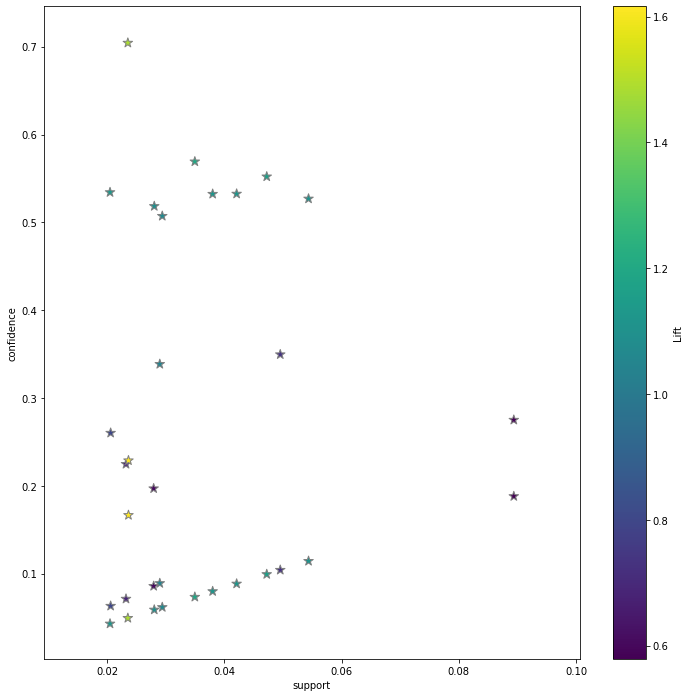

In [24]:
plt.figure(figsize=(12,12))
plt.scatter(rules['support'],rules['confidence'],marker='*',edgecolors='grey',s=100,c=rules['lift'])
plt.colorbar(label='Lift')
plt.xlabel('support')
plt.ylabel('confidence')

Lets visualize the network graph of the associated items

In [25]:
def draw_graph(rules, rules_to_show):
    import networkx as nx  
    plt.figure(figsize=(10,8))
    G1 = nx.DiGraph()
    
    color_map=[]
    N = 400
    colors = np.random.rand(N)    
    strs=[]
    for i in range(rules_to_show):
        strs.append('R'+str(i))
    
    for i in range (rules_to_show):      
        G1.add_nodes_from(["R"+str(i)])
         
        for a in rules.iloc[i]['antecedents']:
                
            G1.add_nodes_from([a])        
            G1.add_edge(a, "R"+str(i), color=colors[i] , weight = 1.5)
        
        for c in rules.iloc[i]['consequents']:         
            G1.add_nodes_from([c])
            G1.add_edge("R"+str(i), c, color=colors[i],  weight=1.5)
    
    for node in G1:
        if node in strs:
            color_map.append('black')
        else:
            color_map.append('red')
            
    edges = G1.edges()
    colors = [G1[u][v]['color'] for u,v in edges]
    weights = [G1[u][v]['weight'] for u,v in edges]

    pos = nx.spring_layout(G1, k=16, scale=1)
    nx.draw(G1, pos, edges=edges, node_color = color_map, edge_color=colors, width=weights, font_size=14, with_labels=False)            
    for p in pos:  # raise text positions
        pos[p][1] += 0.08
    nx.draw_networkx_labels(G1, pos)

C:\Users\vaish\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):
C:\Users\vaish\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:585: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  and cb.iterable(edge_color) \
C:\Users\vaish\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:595: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  for c in edge_color]):
C:\Users\vaish\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:676: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if cb.iterable(node_size):  # many node sizes


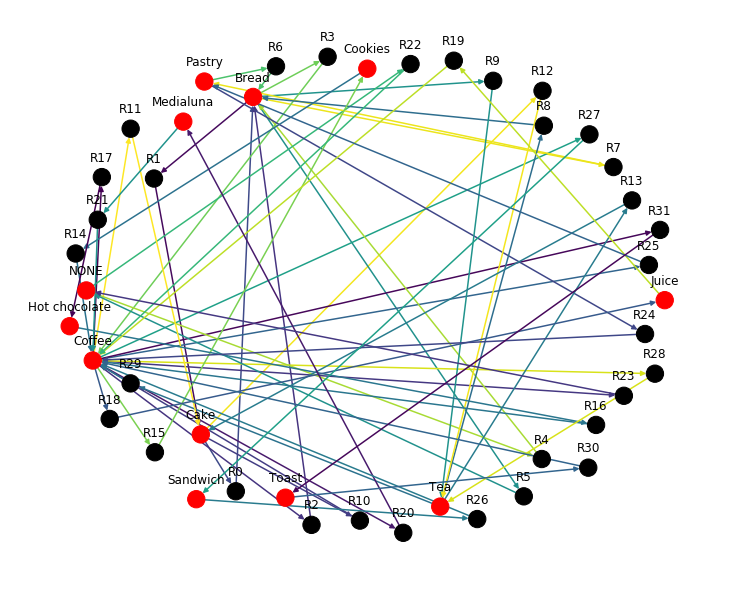

In [26]:
draw_graph(rules,len(rules))

In [27]:
frequent_itemset1 = apriori(df1, use_colnames=True, min_support=0.03)
rules1 = association_rules(frequent_itemset, metric="lift", min_threshold=0.8)

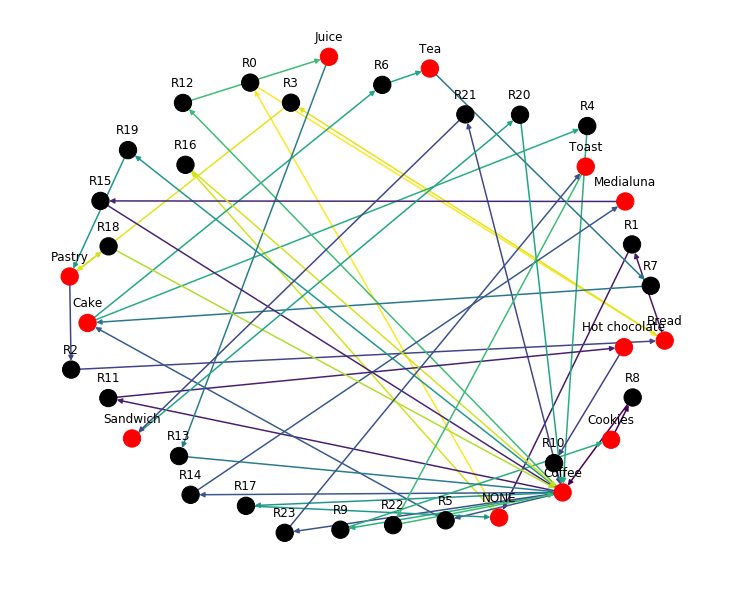

In [28]:
draw_graph(rules1,len(rules1))

In [29]:
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
import matplotlib.dates as mdates

%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 10,6

In [30]:

dataset = pd.read_csv("tot_tr3_DATA_final.csv")

dataset['Date'] = pd.to_datetime(dataset['Date'], infer_datetime_format=True)
indexedDataset = dataset.set_index(['Date'])
dataset

,Date,Transaction
0,2016-10-30,180
1,2016-10-31,205
2,2016-11-01,154
3,2016-11-02,169
4,2016-11-03,195
...,...,...
157,2017-04-05,145
158,2017-04-06,119
159,2017-04-07,103
160,2017-04-08,209


In [31]:
indexedDataset.drop(indexedDataset.index[0],inplace=True)
display(indexedDataset)


,Transaction
Date,
2016-10-31,205
2016-11-01,154
2016-11-02,169
2016-11-03,195
2016-11-04,192
...,...
2017-04-05,145
2017-04-06,119
2017-04-07,103


C:\Users\vaish\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


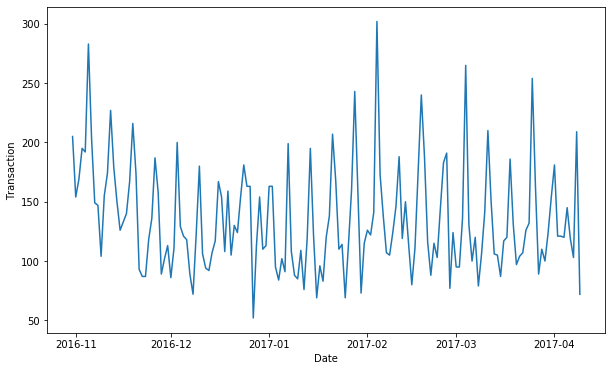

In [32]:
plt.xlabel("Date")
plt.ylabel("Transaction")
plt.plot(indexedDataset)

In [33]:
#now check the stationarity
#we see that the data is not stationary, i.e., mean is not constant

#Determing rolling stats - 1st variety of test to check stationarity
rolmean = indexedDataset.rolling(window=13).mean()
rolstd  = indexedDataset.rolling(window=13).std()

print(rolmean,rolstd)

            Transaction
Date                   
2016-10-31          NaN
2016-11-01          NaN
2016-11-02          NaN
2016-11-03          NaN
2016-11-04          NaN
...                 ...
2017-04-05   139.538462
2017-04-06   138.538462
2017-04-07   126.923077
2017-04-08   130.461538
2017-04-09   129.153846

[161 rows x 1 columns]             Transaction
Date                   
2016-10-31          NaN
2016-11-01          NaN
2016-11-02          NaN
2016-11-03          NaN
2016-11-04          NaN
...                 ...
2017-04-05    42.785542
2017-04-06    43.126974
2017-04-07    26.609715
2017-04-08    33.873823
2017-04-09    35.876748

[161 rows x 1 columns]


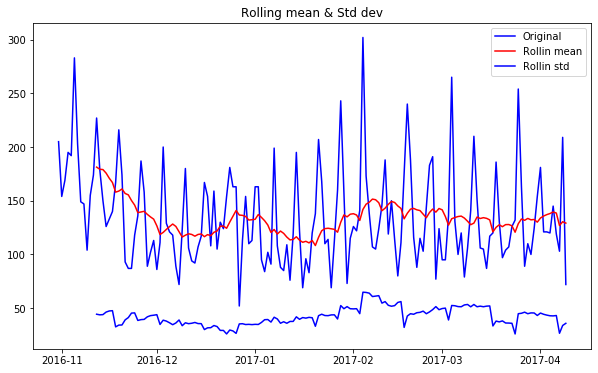

In [34]:
#now plot rolling stats

# indexedDataset['Date'] = mdates.date2num(indexedDataset.Date.dt.to_pydatetime())

orig = plt.plot(indexedDataset, color='blue', label='Original')
mean = plt.plot(rolmean,color='red', label='Rollin mean' )
std = plt.plot(rolstd, color='b', label='Rollin std' )
plt.legend(loc='best')
plt.title('Rolling mean & Std dev')
plt.show()
#mean and std dev are not stationary

In [35]:
#Perform Dickey-fuller test as well
from statsmodels.tsa.stattools import adfuller

#AIC gives exact values and actual values and gives comparison values btwn them
#we have a huge p values, generally it should be 0.5 or less
#Also critical value should be more than the test statistic
#Data is NOT stationary
print('Result of Dickey fuller test:')
dftest = adfuller(indexedDataset['Transaction'], autolag='AIC')

dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#lags used','no of observations used'])
for key,value in dftest[4].items():
    dfoutput['Critical value (%s)'%key] = value

print(dfoutput)

Result of Dickey fuller test:
Test Statistic              -3.144342
p-value                      0.023441
#lags used                  13.000000
no of observations used    147.000000
Critical value (1%)         -3.475637
Critical value (5%)         -2.881410
Critical value (10%)        -2.577365
dtype: float64


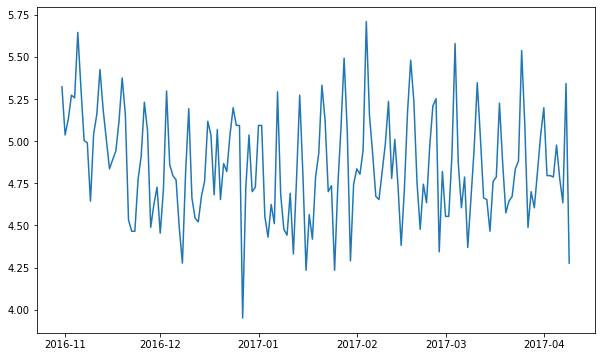

In [36]:
#estimating trend
#just consider log of indexeddataset, therefore nos on Y Axis have changed
indexedDataset_logscale=np.log(indexedDataset)
plt.plot(indexedDataset_logscale)

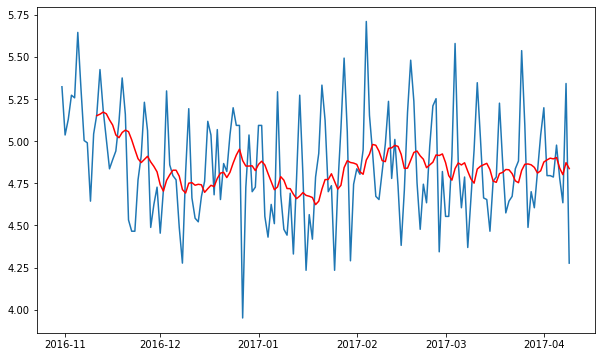

In [37]:
#calc MA with log time series
movingaverage = indexedDataset_logscale.rolling(window=12).mean()
movingSTD = indexedDataset_logscale.rolling(window=12).std()
#plt.plot(indexedDataset_logrolling)
plt.plot(indexedDataset_logscale)
plt.plot(movingaverage, color='red')

In [38]:
#get the difference btwn MA and actual no of passengers
#unless we perform all these transformations we'll not get TS to be stationary
#This is NOT a std way. There are many ways to do it.
datasetlogscaleminusmovingavg = indexedDataset_logscale - movingaverage
datasetlogscaleminusmovingavg.head(5)

,Transaction
Date,
2016-10-31,NaN
2016-11-01,NaN
2016-11-02,NaN
2016-11-03,NaN
2016-11-04,NaN


In [39]:
#remove nan values
datasetlogscaleminusmovingavg.dropna(inplace=True)
datasetlogscaleminusmovingavg.head(5)

,Transaction
Date,
2016-11-11,0.007367
2016-11-12,0.264767
2016-11-13,0.014666
2016-11-14,-0.152145
2016-11-15,-0.290106


In [40]:
#we're performing this to see if TS is stationary or not
from statsmodels.tsa.stattools import adfuller

def test_stationary(timeseries):
    
    #Determining rolling stats
    movingaverage = timeseries.rolling(window=12).mean()
    movingSTD = timeseries.rolling(window=12).std()
    
    #Plot rolling stats
    orig = plt.plot(timeseries, color='blue', label='original')
    mean = plt.plot(movingaverage, color='red', label='rolling mean')
    std = plt.plot(movingSTD, color='black',label='std dev')
    plt.legend(loc='best')
    plt.title('Rolling mean & Std dev')
    plt.show()
    
    #Dickey Fuller test
    print('Result of Dickey fuller test:')
    timeseries = timeseries[timeseries != 0]
    inf = float('inf')
    timeseries = timeseries[timeseries != inf]
    timeseries = dataset.set_index(['Date'])
    timeseries = timeseries.fillna(method='ffill')
    dftest = adfuller(timeseries['Transaction'], autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#lags used','no of observations used'])
    for key,value in dftest[4].items():
        dfoutput['Critical value (%s)'%key] = value
    print(dfoutput)
    

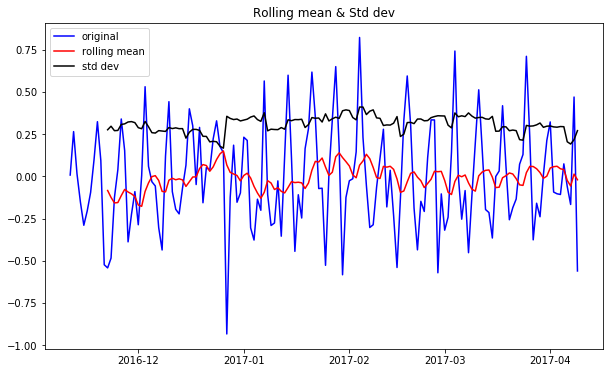

Result of Dickey fuller test:
Test Statistic              -2.962820
p-value                      0.038515
#lags used                  13.000000
no of observations used    148.000000
Critical value (1%)         -3.475325
Critical value (5%)         -2.881275
Critical value (10%)        -2.577293
dtype: float64


In [41]:
#here we see that the p value has decreased from 0.99 to 0.02
test_stationary(datasetlogscaleminusmovingavg)

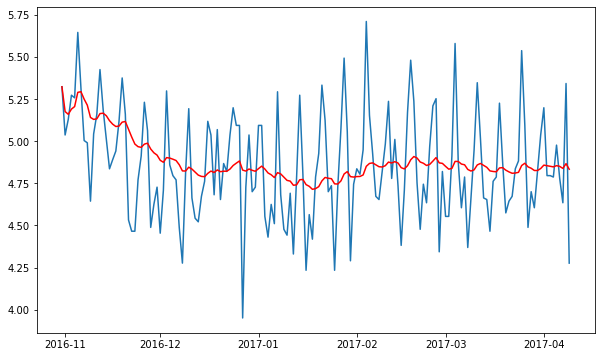

In [42]:
#now we calculate the weighted avg in TS, to see the trend
#we see upward trend
exponentialdecaywtdavg = indexedDataset_logscale.ewm(halflife=12, min_periods=0, adjust=True).mean()
plt.plot(indexedDataset_logscale)
plt.plot(exponentialdecaywtdavg, color='red')

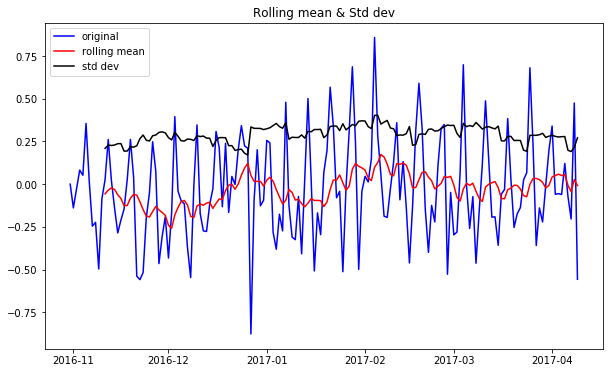

Result of Dickey fuller test:
Test Statistic              -2.962820
p-value                      0.038515
#lags used                  13.000000
no of observations used    148.000000
Critical value (1%)         -3.475325
Critical value (5%)         -2.881275
Critical value (10%)        -2.577293
dtype: float64


In [43]:
#here we remove the weighted avg,, to check for stationarity

datasetlogscaleminusmovexpodecayavg = indexedDataset_logscale - exponentialdecaywtdavg
test_stationary(datasetlogscaleminusmovexpodecayavg)

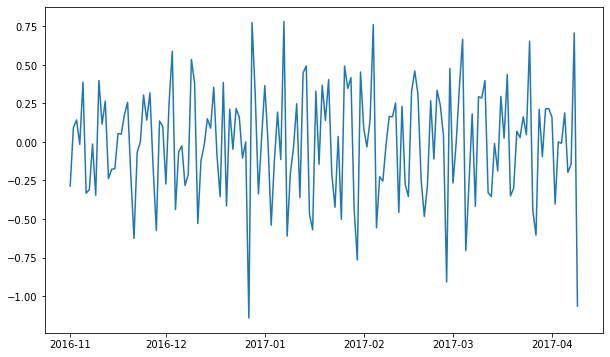

In [44]:
datasetlogdiffshifting = indexedDataset_logscale - indexedDataset_logscale.shift()
plt.plot(datasetlogdiffshifting)

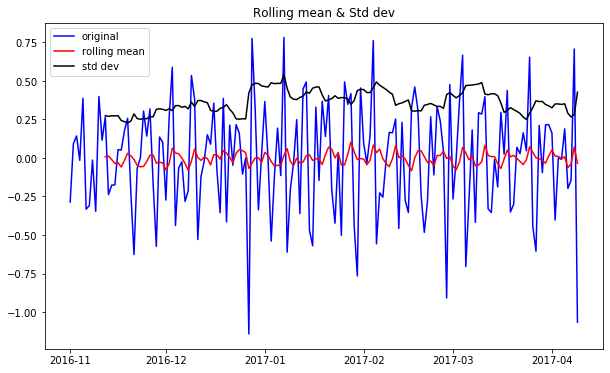

Result of Dickey fuller test:
Test Statistic              -2.962820
p-value                      0.038515
#lags used                  13.000000
no of observations used    148.000000
Critical value (1%)         -3.475325
Critical value (5%)         -2.881275
Critical value (10%)        -2.577293
dtype: float64


In [45]:
datasetlogdiffshifting.dropna(inplace=True)
test_stationary(datasetlogdiffshifting)

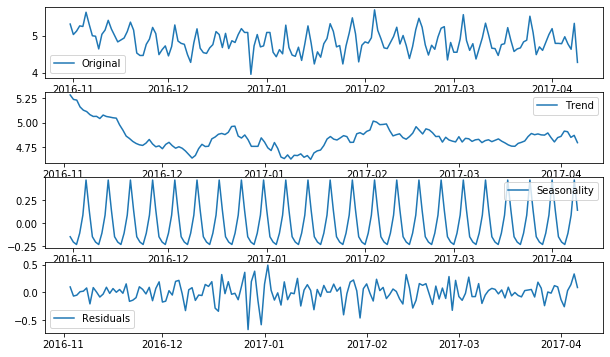

In [46]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(indexedDataset_logscale)
# indexedDataset_logscale = indexedDataset_logscale.fillna(method='ffill')

# decomposition = seasonal_decompose(indexedDataset_logscale.index.values, period=30)
trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

plt.subplot(411)
plt.plot(indexedDataset_logscale, label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal, label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual, label='Residuals')
plt.legend(loc='best')


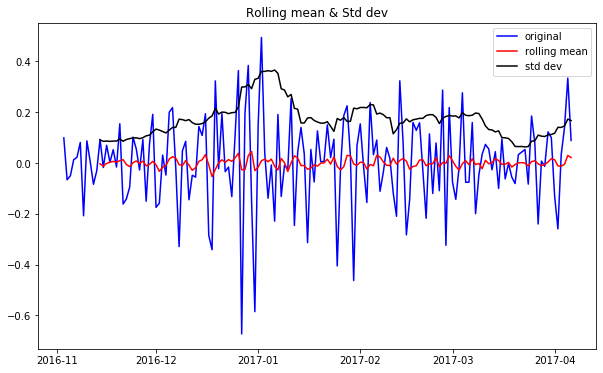

Result of Dickey fuller test:
Test Statistic              -2.962820
p-value                      0.038515
#lags used                  13.000000
no of observations used    148.000000
Critical value (1%)         -3.475325
Critical value (5%)         -2.881275
Critical value (10%)        -2.577293
dtype: float64


In [47]:
decomposedLogData = residual
decomposedLogData.dropna(inplace=True)
test_stationary(decomposedLogData)

C:\Users\vaish\Anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:541: FutureWarning: fft=True will become the default in a future version of statsmodels. To suppress this warning, explicitly set fft=False.
  warnings.warn(msg, FutureWarning)


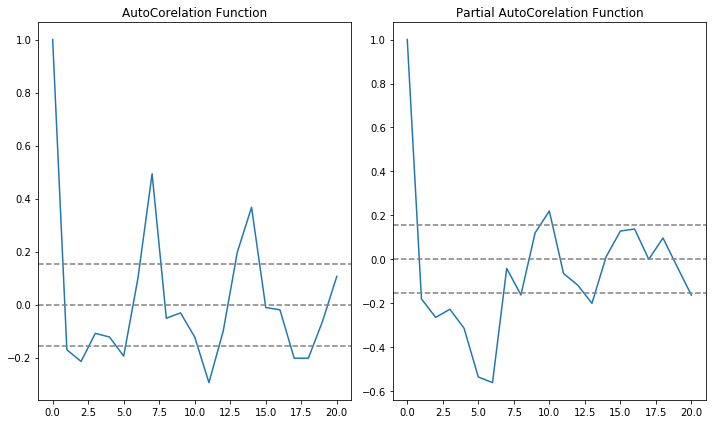

In [48]:
#ACF and PACF model
from statsmodels.tsa.stattools import acf, pacf

lag_acf = acf(datasetlogdiffshifting, nlags=20)
lag_pacf = pacf(datasetlogdiffshifting, nlags=20, method='ols')

#PLOT ACF
plt.subplot(121)
plt.plot(lag_acf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(datasetlogdiffshifting)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(datasetlogdiffshifting)),linestyle='--',color='gray')
plt.title('AutoCorelation Function')

#PLOT PACF
plt.subplot(122)
plt.plot(lag_pacf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(datasetlogdiffshifting)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(datasetlogdiffshifting)),linestyle='--',color='gray')
plt.title('Partial AutoCorelation Function')
plt.tight_layout()

C:\Users\vaish\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
C:\Users\vaish\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


Plotting AR Model


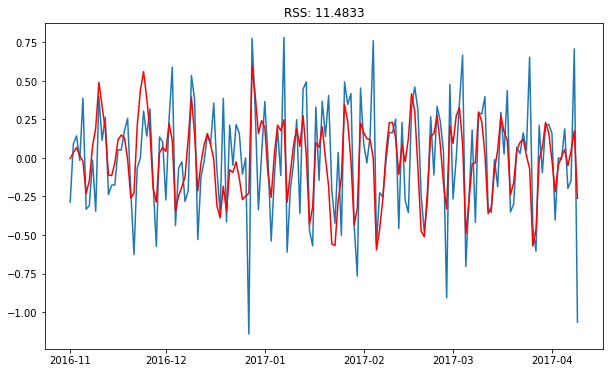

In [49]:
from statsmodels.tsa.arima_model import ARIMA
#AR is coreln btwn previous time period to current
#AR Model
model = ARIMA(indexedDataset_logscale, order=(2,1,2))

results_AR = model.fit(disp=-1)
plt.plot(datasetlogdiffshifting)
plt.plot(results_AR.fittedvalues, color='red')
plt.title('RSS: %.4f'% sum((results_AR.fittedvalues-datasetlogdiffshifting['Transaction'])**2))
print('Plotting AR Model')

C:\Users\vaish\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
C:\Users\vaish\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


Plotting MA Model


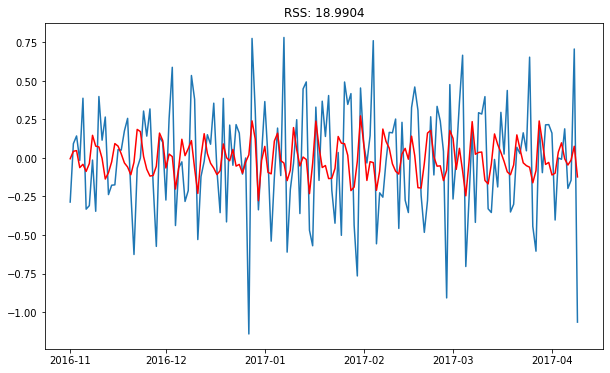

In [50]:
#there is always some noise and we need to find out the avg of that noise
#when we try to avg, the crust and trough present smoothen out and we have avg of it
#MA Model
model = ARIMA(indexedDataset_logscale, order=(2,1,0))
results_MA = model.fit(disp=-1)
plt.plot(datasetlogdiffshifting)
plt.plot(results_MA.fittedvalues, color='red')
plt.title('RSS: %.4f'% sum((results_MA.fittedvalues-datasetlogdiffshifting['Transaction'])**2))
print('Plotting MA Model')

C:\Users\vaish\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
C:\Users\vaish\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


Text(0.5, 1.0, 'RSS: 11.4833')

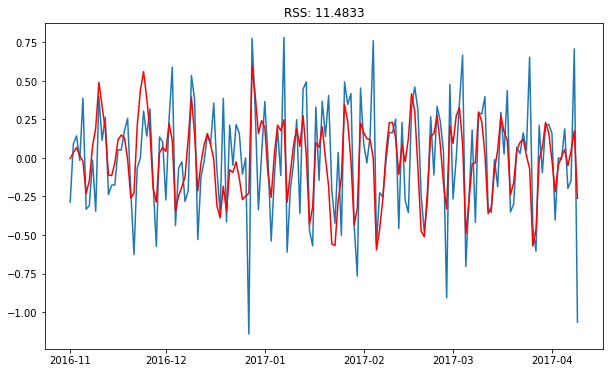

In [51]:
model = ARIMA(indexedDataset_logscale, order=(2,1,2))
results_ARIMA = model.fit(disp=-1)
plt.plot(datasetlogdiffshifting)
plt.plot(results_ARIMA.fittedvalues, color='red')
plt.title('RSS: %.4f'% sum((results_ARIMA.fittedvalues-datasetlogdiffshifting['Transaction'])**2))

In [52]:
predictions_ARIMA_diff = pd.Series(results_ARIMA.fittedvalues, copy=True)
print(predictions_ARIMA_diff.head())

Date
2016-11-01   -0.003088
2016-11-02    0.035826
2016-11-03    0.068434
2016-11-04    0.014759
2016-11-05   -0.022022
dtype: float64


In [53]:
#Convert to cumulative sum
predictions_ARIMA_diff_cumsum = predictions_ARIMA_diff.cumsum()
print(predictions_ARIMA_diff_cumsum.head())

Date
2016-11-01   -0.003088
2016-11-02    0.032738
2016-11-03    0.101172
2016-11-04    0.115931
2016-11-05    0.093910
dtype: float64


In [54]:
#predictions_ARIMA_log = pd.Series(indexedDataset_logscale['Passengers'].ix[0], indexedDataset_logscale.index)
predictions_ARIMA_log = pd.Series(indexedDataset_logscale['Transaction'].iloc[0], indexedDataset_logscale.index)
predictions_ARIMA_log = predictions_ARIMA_log.add(predictions_ARIMA_diff_cumsum, fill_value=0)
predictions_ARIMA_log.head()

Date
2016-10-31    5.323010
2016-11-01    5.319922
2016-11-02    5.355748
2016-11-03    5.424182
2016-11-04    5.438941
dtype: float64

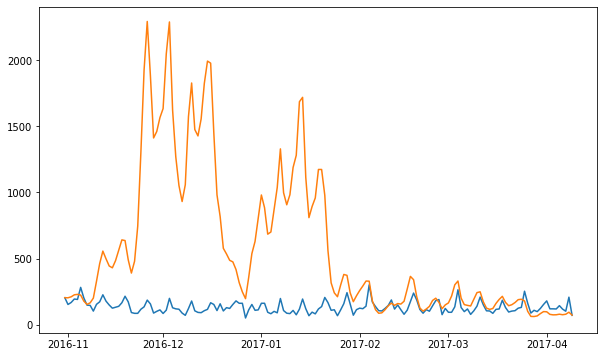

In [55]:
predictions_ARIMA = np.exp(predictions_ARIMA_log)
plt.plot(indexedDataset)
plt.plot(predictions_ARIMA)

In [56]:
indexedDataset_logscale

,Transaction
Date,
2016-10-31,5.323010
2016-11-01,5.036953
2016-11-02,5.129899
2016-11-03,5.273000
2016-11-04,5.257495
...,...
2017-04-05,4.976734
2017-04-06,4.779123
2017-04-07,4.634729


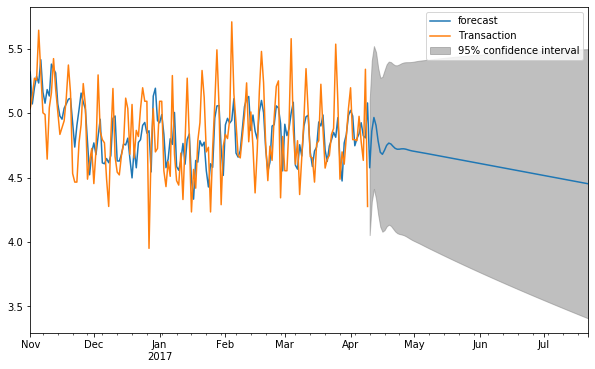

In [57]:
results_ARIMA.plot_predict(1,264)
x=results_ARIMA.forecast(steps=120)